# select best models

In [1]:
#grid with elastic cv
#picked gridcv bcos built in regression models

# lasso has lowest error

In [2]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import scipy as sp
from joblib import dump
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("cs1_part3_res.csv")

In [4]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
lasso_model = LassoCV()

In [7]:
lasso_model.fit(X_train,y_train)

LassoCV()

In [8]:
pred_test_lasso = lasso_model.predict(X_test)

In [9]:
pred_test_lasso

array([11.68973164, 12.1928998 , 12.09304532, 12.23153359, 11.81763633,
       12.19960418, 12.33479957, 11.63276568, 12.1656822 , 11.66032914,
       12.47017279, 11.894403  , 11.67583413, 12.19522331, 12.20530272,
       11.58304685, 12.50440253, 12.78333383, 12.17222069, 12.31580569,
       12.22981275, 11.65470893, 11.84780025, 11.98816983, 11.94350312,
       11.78233079, 12.83360625, 12.00189218, 12.16911051, 12.76944492,
       12.18739751, 12.21026841, 12.05983765, 12.25108996, 11.79097418,
       12.70486603, 11.18187721, 12.12377777, 12.52985297, 12.19830622,
       11.68910181, 11.19829151, 11.84652081, 11.84148852, 12.29100311,
       12.18984965, 11.75096112, 12.09573236, 12.27581824, 12.10303607,
       11.42570494, 11.80660626, 11.96839736, 12.04099951, 11.65913417,
       12.33168953, 11.72592479, 12.16418796, 12.02124741, 11.8041771 ,
       11.90940953, 12.19961577, 11.88064881, 11.96209734, 11.81949804,
       11.97493691, 11.94550242, 11.90768366, 12.02180971, 12.00

In [10]:
MAE_Lasso = mean_absolute_error(y_test,pred_test_lasso)
MSE_Lasso = mean_squared_error(y_test,pred_test_lasso)
RMSE_Lasso = np.sqrt(MSE_Lasso)

In [11]:
MAE_Lasso

0.07538608694325545

In [12]:
MSE_Lasso

0.010637911609940669

In [13]:
RMSE_Lasso

0.10314025213242728

In [14]:
def MAPE(y_test,pred_test_lasso):
    mape = np.mean(np.abs((y_test - pred_test_lasso)/y_test))*100
    return mape

In [15]:
LR_MAPElassocv= MAPE(y_test,pred_test_lasso)

In [16]:
print("lassocv MAPE: ",LR_MAPElassocv)

lassocv MAPE:  0.6309258632396242


# find correlation features based on lasso

In [17]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.804607
Best score using built-in LassoCV: 0.823900


In [18]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 13 variables and eliminated the other 215 variables


In [19]:
np.where(coef != 0)

(array([ 2,  9, 10, 11, 18, 22, 26, 28, 40, 43, 47, 48, 51], dtype=int64),)

In [20]:
df.columns[[2,9,10,11,18,22,26,28,40,43,47,48,51]]

Index(['lot_area', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'bsmtfin_sf_1', 'total_bsmt_sf', '2nd_flr_sf', 'gr_liv_area',
       'garage_yr_blt', 'garage_area', 'wood_deck_sf', 'open_porch_sf',
       'screen_porch'],
      dtype='object')

In [21]:
x = reg.coef_
x

array([-0.00000000e+00,  0.00000000e+00,  2.04989643e-06,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.28660674e-03,  1.88226082e-03,  5.64594906e-05,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  1.09148062e-04, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  2.18294044e-04, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.71886301e-05, -0.00000000e+00,
        3.49015712e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        6.67017101e-05, -0.00000000e+00,  0.00000000e+00,  2.35372924e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.01237793e-04,
        2.44649970e-05, -0.00000000e+00,  0.00000000e+00,  2.67959548e-05,
       -0.00000000e+00, -

In [22]:
np.where(x)

(array([ 2,  9, 10, 11, 18, 22, 26, 28, 40, 43, 47, 48, 51], dtype=int64),)

# train new model with selected features

In [23]:
#include saleprice here
df = df[['lot_area', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'bsmtfin_sf_1', 'total_bsmt_sf', '2nd_flr_sf', 'gr_liv_area',
       'garage_yr_blt', 'garage_area', 'wood_deck_sf', 'open_porch_sf',
       'screen_porch','saleprice']]

In [24]:
##Log transformation of sale price for whole training set
x = np.expm1(y)
df['saleprice'] = x

In [25]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
lasso_model = LassoCV()

In [28]:
lasso_model.fit(X_train,y_train)

LassoCV()

In [29]:
pred_test_lasso = lasso_model.predict(X_test)

In [30]:
pred_test_lasso[pred_test_lasso<0] = 0

In [31]:
pred_test_lasso

array([195845.44847021, 272921.11310582, 373149.97925022,  63463.04269821,
       126813.84308592, 222633.57079279,  64251.37256267, 212965.07277916,
       194984.08894827, 128992.5921412 , 300179.35877269, 144604.23662109,
       162291.65739093, 216020.61948865,  99801.06465744, 251177.43382408,
       131740.96713194, 228646.58203418, 122583.48972256,  93723.94738117,
       161143.11573798, 196303.5984457 , 156591.98066979, 260596.5159915 ,
       244532.59518752, 245269.44290167, 245857.16114006, 101540.5242623 ,
       130839.59682619, 190285.11594882, 182065.44955029,  79098.21114883,
       148973.6217674 , 139415.92290423, 241354.55790283, 194469.84599156,
       188269.23026035, 292989.73721751, 127202.77238155, 107833.76071753,
       205996.79275178, 216895.26802673, 140901.05424612, 197319.35431412,
       107345.35776963, 221903.46181726, 145030.69691758, 159424.71010003,
       236484.39323588,  83558.04725187, 165866.20872209, 187624.83878234,
       122998.72448938, 1

In [32]:
MAE_Lasso = mean_absolute_error(y_test,pred_test_lasso)
MSE_Lasso = mean_squared_error(y_test,pred_test_lasso)
RMSE_Lasso = np.sqrt(MSE_Lasso)

In [33]:
MAE_Lasso

22335.142774946074

In [34]:
MSE_Lasso

995861143.8839333

In [35]:
RMSE_Lasso

31557.267687237014

In [36]:
def MAPE(y_test,pred_test_lasso):
    mape = np.mean(np.abs((y_test - pred_test_lasso)/y_test))*100
    return mape

In [37]:
LR_MAPElassocv= MAPE(y_test,pred_test_lasso)

In [38]:
print("lassocv MAPE: ",LR_MAPElassocv)

lassocv MAPE:  13.812054936011354


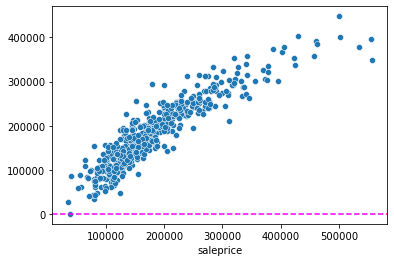

In [39]:
sns.scatterplot(x=y_test,y=pred_test_lasso)
plt.axhline(y=0,color='magenta',linestyle='--')

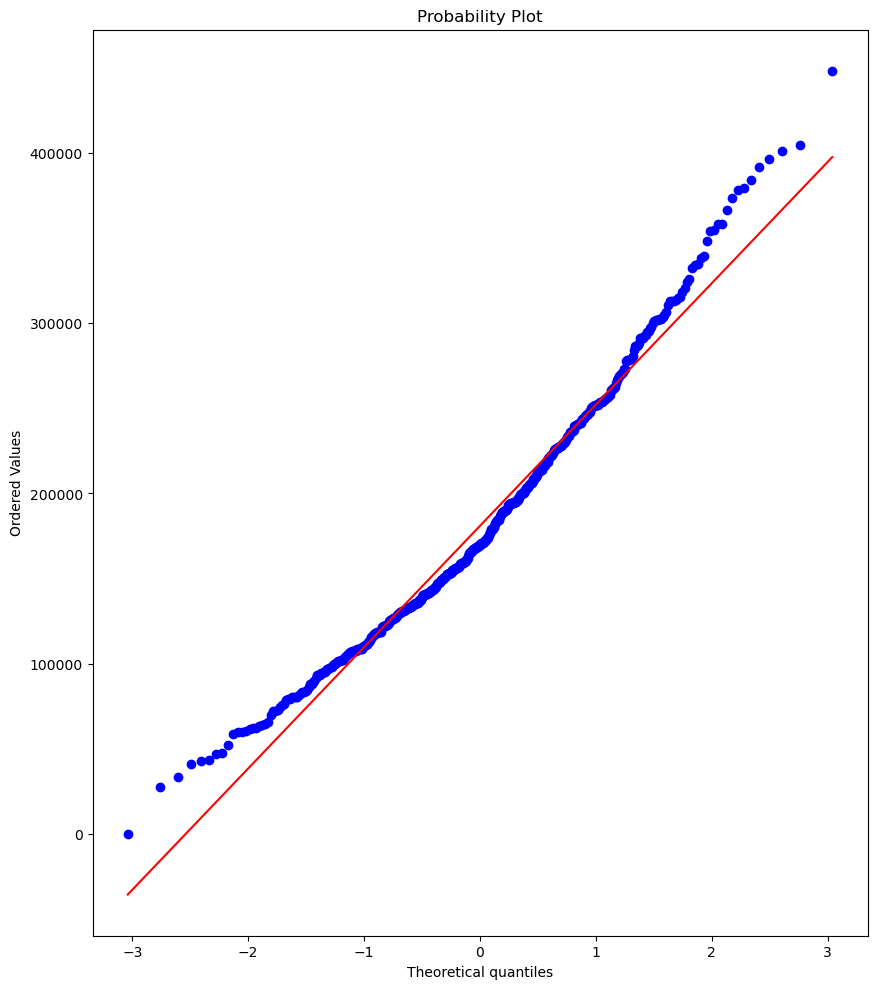

In [40]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(pred_test_lasso,plot=ax)

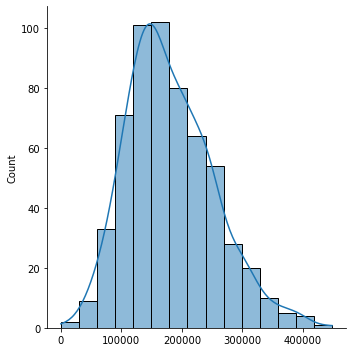

In [41]:
sns.displot(pred_test_lasso,bins=15,kde=True)

In [42]:
#dump(scaler,"cs1_Ames_Housing_scaler.pkl")

['cs1_Ames_Housing_scaler.pkl']

In [43]:
#dump(lasso_model,"cs1_Ames_Housing_model.h5")

['cs1_Ames_Housing_model.h5']